In [3]:
import os
import sys
sys.path.append(os.path.abspath(".."))

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import porespy as ps
import scipy as sp

import sys
sys.path.append("../src/")

import numpy as np
import pandas as pd

import torch

from torchvision.datasets import MNIST, KMNIST, CIFAR10, FashionMNIST
from torchvision.io import read_image

from torchvision.transforms.v2 import Compose
from torchvision.transforms.v2 import ToImage, Lambda, Resize, CenterCrop, Grayscale, ToDtype
from transforms import SoftThreshold, HardThreshold, Dilate
from src.data import PersistenceTransformDataset, collate_fn

from sklearn.decomposition import PCA

import gudhi as gd
from tqdm import tqdm

import pickle

np.set_printoptions(precision=2, suppress=True, linewidth=120, edgeitems=45, threshold=100)
torch.set_printoptions(precision=2, sci_mode=False, linewidth=120, edgeitems=45, threshold=100)

[11:30:23] ERROR    PARDISO solver not installed, run `pip install pypardiso`. Otherwise,          ]8;id=706623;file://C:\Users\ХХХ\AppData\Roaming\Python\Python310\site-packages\openpnm\utils\_workspace.py\_workspace.py]8;;\:]8;id=521002;file://C:\Users\ХХХ\AppData\Roaming\Python\Python310\site-packages\openpnm\utils\_workspace.py#56\56]8;;\
                    simulations will be slow. Apple M chips not supported.                                         

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## MNIST

In [5]:
dataset_base_train = MNIST(root="../data/_tmp/", train=True, download=True)
dataset_base_test = MNIST(root="../data/_tmp/", train=False, download=True)
dataset_diagrams_train = pickle.load(open("../data/MNIST_D_train_dir.pkl", "rb"))
dataset_diagrams_test = pickle.load(open("../data/MNIST_D_test_dir.pkl", "rb"))


idx = [0]
eps = 0.05
dataset_train_1 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_1 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [2, 4]
eps = 0.05
dataset_train_2 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_2 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [1, 3, 5, 7]
eps = 0.05
dataset_train_4= PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_4 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [0,1,2,3,4,5,6,7]
eps = 0.05
dataset_train_8 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_8 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

In [6]:
import torch

def count_non_inf_rows(tensor):
    is_finite = torch.isfinite(tensor)
    all_finite = torch.all(is_finite, dim=1)
    count = torch.sum(all_finite).item()
    return count

In [7]:
num_points_all_1 = []

for i in range(len(dataset_train_1.D)):
    diagram = dataset_train_1.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_1.append(num_points)


num_points_all_2 = []

for i in range(len(dataset_train_2.D)):
    diagram = dataset_train_2.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_2.append(num_points)


num_points_all_4 = []

for i in range(len(dataset_train_4.D)):
    diagram = dataset_train_4.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_4.append(num_points)


num_points_all_8 = []

for i in range(len(dataset_train_8.D)):
    diagram = dataset_train_8.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_8.append(num_points)

In [12]:
print(np.mean(num_points_all_1))
print(np.mean(num_points_all_2))
print(np.mean(num_points_all_4))
print(np.mean(num_points_all_8))

7.3653
14.1925
28.42665
56.8445


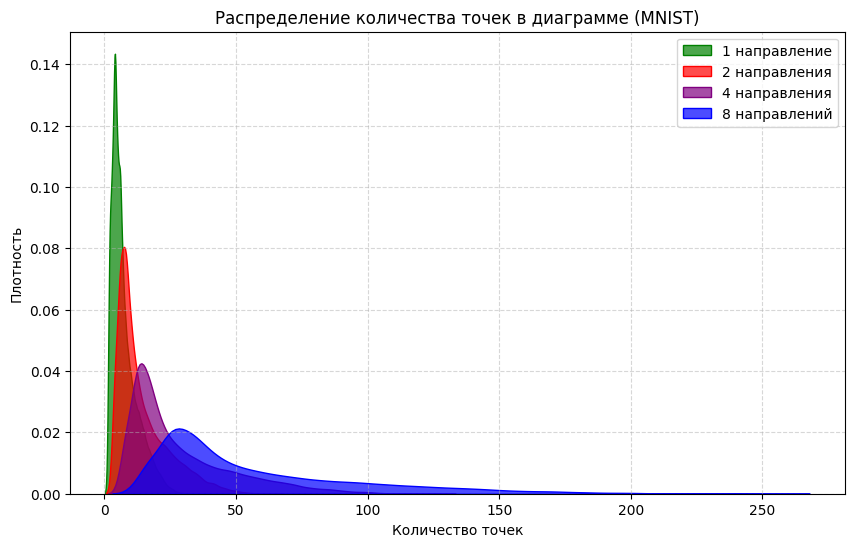

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Построение KDE для каждого списка с разными цветами и подписями
sns.kdeplot(num_points_all_1, fill=True, color='green', label='1 направление', alpha=0.7)
sns.kdeplot(num_points_all_2, fill=True, color='red', label='2 направления', alpha=0.7)
sns.kdeplot(num_points_all_4, fill=True, color='purple', label='4 направления', alpha=0.7)
sns.kdeplot(num_points_all_8, fill=True, color='blue', label='8 направлений', alpha=0.7)

plt.title("Распределение количества точек в диаграмме (MNIST)")
plt.xlabel("Количество точек")
plt.ylabel("Плотность")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend() 
plt.show()

## K-MNIST

In [47]:
dataset_base_train = KMNIST(root="../data/_tmp/", train=True, download=True)
dataset_base_test = KMNIST(root="../data/_tmp/", train=False, download=True)
dataset_diagrams_train = pickle.load(open("../data/KMNIST_D_train_dir.pkl", "rb"))
dataset_diagrams_test = pickle.load(open("../data/KMNIST_D_test_dir.pkl", "rb"))


idx = [0]
eps = 0.05
dataset_train_1 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_1 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [2, 4]
eps = 0.05
dataset_train_2 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_2 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [1, 3, 5, 7]
eps = 0.05
dataset_train_4= PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_4 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [0,1,2,3,4,5,6,7]
eps = 0.05
dataset_train_8 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_8 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

In [48]:
num_points_all_1 = []

for i in range(len(dataset_train_1.D)):
    diagram = dataset_train_1.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_1.append(num_points)


num_points_all_2 = []

for i in range(len(dataset_train_2.D)):
    diagram = dataset_train_2.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_2.append(num_points)


num_points_all_4 = []

for i in range(len(dataset_train_4.D)):
    diagram = dataset_train_4.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_4.append(num_points)


num_points_all_8 = []

for i in range(len(dataset_train_8.D)):
    diagram = dataset_train_8.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_8.append(num_points)

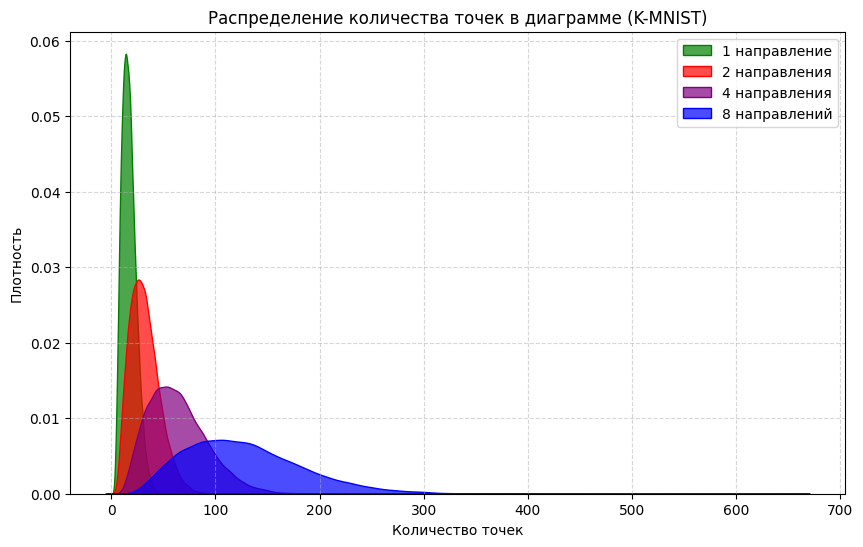

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Построение KDE для каждого списка с разными цветами и подписями
sns.kdeplot(num_points_all_1, fill=True, color='green', label='1 направление', alpha=0.7)
sns.kdeplot(num_points_all_2, fill=True, color='red', label='2 направления', alpha=0.7)
sns.kdeplot(num_points_all_4, fill=True, color='purple', label='4 направления', alpha=0.7)
sns.kdeplot(num_points_all_8, fill=True, color='blue', label='8 направлений', alpha=0.7)

plt.title("Распределение количества точек в диаграмме (K-MNIST)")
plt.xlabel("Количество точек")
plt.ylabel("Плотность")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend() 
plt.show()

## F-MNIST

In [51]:
dataset_base_train = FashionMNIST(root="../data/_tmp/", train=True, download=True)
dataset_base_test =  FashionMNIST(root="../data/_tmp/", train=False, download=True)
dataset_diagrams_train = pickle.load(open("../data/FMNIST_D_train_dir.pkl", "rb"))
dataset_diagrams_test = pickle.load(open("../data/FMNIST_D_test_dir.pkl", "rb"))


idx = [0]
eps = 0.05
dataset_train_1 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_1 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [2, 4]
eps = 0.05
dataset_train_2 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_2 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

# idx = [1, 3, 5, 7]
# eps = 0.05
# dataset_train_4= PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
# dataset_test_4 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

# idx = [0,1,2,3,4,5,6,7]
# eps = 0.05
# dataset_train_8 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
# dataset_test_8 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

RuntimeError: [enforce fail at alloc_cpu.cpp:115] data. DefaultCPUAllocator: not enough memory: you tried to allocate 2631360000 bytes.

In [ ]:
num_points_all_1 = []

for i in range(len(dataset_train_1.D)):
    diagram = dataset_train_1.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_1.append(num_points)


num_points_all_2 = []

for i in range(len(dataset_train_2.D)):
    diagram = dataset_train_2.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_2.append(num_points)

In [ ]:
num_points_all_4 = []

for i in range(len(dataset_train_4.D)):
    diagram = dataset_train_4.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_4.append(num_points)


num_points_all_8 = []

for i in range(len(dataset_train_8.D)):
    diagram = dataset_train_8.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_8.append(num_points)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.kdeplot(num_points_all_1, fill=True, color='green', label='1 направление', alpha=0.7)
sns.kdeplot(num_points_all_2, fill=True, color='red', label='2 направления', alpha=0.7)
sns.kdeplot(num_points_all_4, fill=True, color='purple', label='4 направления', alpha=0.7)
sns.kdeplot(num_points_all_8, fill=True, color='blue', label='8 направлений', alpha=0.7)

plt.title("Распределение количества точек в диаграмме (Fashion MNIST)")
plt.xlabel("Количество точек")
plt.ylabel("Плотность")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend() 
plt.show()

In [5]:
from typing import Any, Dict
from torchvision.transforms.v2 import Transform
from scipy.ndimage import rotate

def direction_filter(img, alpha, agg="mult"):
    if len(img.shape)==3:
        width, height = img.shape[1], img.shape[2]
    elif len(img.shape)==2:
        width, height = img.shape[0], img.shape[1]
    else:
        raise ValueError()
        
    if width==28:
        img_out = np.zeros((40, 40))
        img_out[6:34, 6:34] = img
        filter_hor = np.repeat(np.linspace(1, 0, 40), 40).reshape(40, 40).T
        filter_dir = (rotate(filter_hor, alpha, reshape=False))[6:34,:][:,6:34]
    elif width==32:
        img_out = np.zeros((46, 46))
        img_out[7:39, 7:39] = img
        filter_hor = np.repeat(np.linspace(1, 0, 46), 46).reshape(46, 46).T
        filter_dir = (rotate(filter_hor, alpha, reshape=False))[7:39,:][:,7:39]
    elif width==64:
        img_out = np.zeros((92, 92))
        img_out[14:78, 14:78] = img
        filter_hor = np.repeat(np.linspace(1, 0, 92), 92).reshape(92, 92).T
        filter_dir = (rotate(filter_hor, alpha, reshape=False))[14:78,:][:,14:78]
    else:
        raise ValueError("Only sizes of 28x28, 32x32, and 64x64 pixels are supported.")
        
    if agg=="mult":
        g = np.multiply
    elif agg=="add":
        g = np.add
    elif agg=="min":
        g = np.minimum
    elif agg=="max":
        g = np.maximum
    else:
        raise ValueError("Aggregation function is either 'mult', 'min' or 'max'.")
    
    return torch.Tensor(g(filter_dir, img))


class Direction(Transform):
    """Transform an image with the direction transform."""
    def __init__(self, alphas, agg="mult"):
        super().__init__()
        self.agg = agg
        self.alphas = alphas
        self.weight = alphas

    def transform(self, inpt: Any, params: Dict[str, Any]) -> Any:
        output = torch.zeros(len(self.alphas), inpt.shape[-2], inpt.shape[-1])
        for i, alpha in enumerate(self.alphas):
            output[i] = direction_filter(inpt, alpha, self.agg)
        return output
    


def imshow3d(img, ax):

    w, h = img.shape
    grid_x, grid_y = np.meshgrid(np.arange(w), np.arange(h))
    x, y = grid_x.ravel(), grid_y.ravel()

    width = depth = 1
    top = img.T.flatten()
    bottom = np.zeros_like(top)

    cmap = cm.get_cmap('bwr')
    rgba = [cmap(p) for p in top]
    
    ax.view_init(elev=60, azim=30, roll=0)
    ax.bar3d(x, y, bottom, width, depth, top, color=rgba, shade=True)


C:\Users\ХХХ\AppData\Local\Temp\ipykernel_960\772231378.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr')


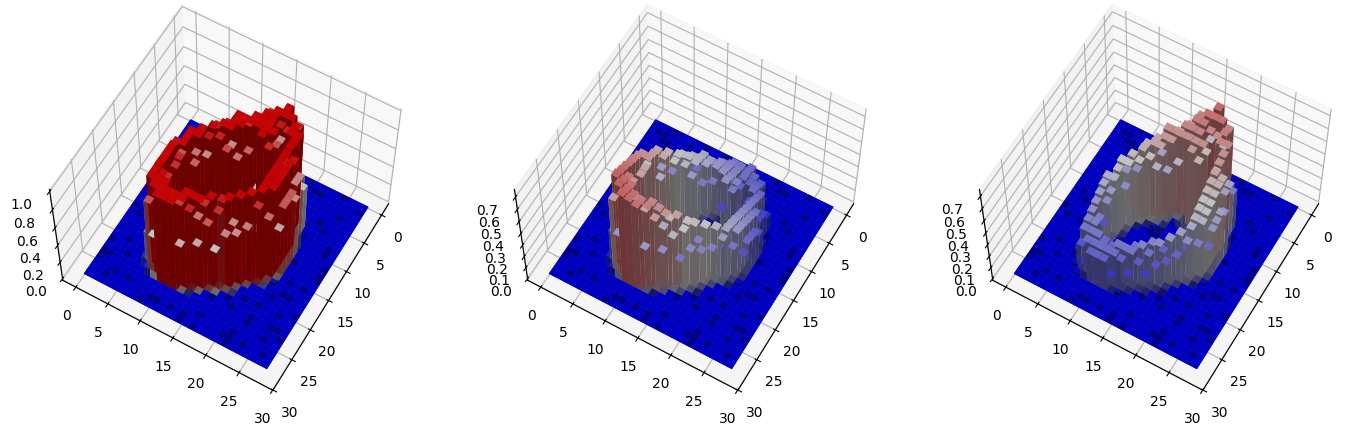

In [6]:
mnist_train = MNIST(root="../data/_tmp/", train=True, download=True)
mnist_test = MNIST(root="../data/_tmp/", train=False, download=True)

X_mnist_train, y_mnist_train = mnist_train.data, mnist_train.targets
X_mnist_test, y_mnist_test = mnist_test.data, mnist_test.targets

transform_mnist = Compose([
    Lambda(lambda x: x / 255),
    ToDtype(torch.float32),
])

alphas = list(np.linspace(0, 360, 16+1)[:-1])
f = Direction(alphas, agg="mult")

img = transform_mnist(X_mnist_train[1])
img_filtered = f(img)
img_filtered.shape


fig, ax = plt.subplots(ncols=3, subplot_kw=dict(projection="3d"), figsize=(17,5))
imshow3d(img, ax[0])
imshow3d(img_filtered[2], ax[1])
imshow3d(img_filtered[12], ax[2])
plt.show()

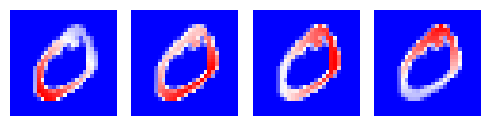

In [13]:
plt.figure(figsize=(5, 3))

plt.subplot(1, 4, 1)
plt.imshow(img_filtered[2], cmap='bwr')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_filtered[6], cmap='bwr')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_filtered[8], cmap='bwr')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_filtered[12], cmap='bwr')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for idx, ax in enumerate(axes):
    sp = sublevel_persistence(img_filtered[idx].unsqueeze(0))[0]
    birth = sp[:, 0]
    death = sp[:, 1]
    dim = sp[:, 2].int()

    for d in torch.unique(dim):
        mask = (dim == d)
        ax.scatter(birth[mask], death[mask], label=f'Dim {d.item()}', alpha=0.6, s=10)
    
    max_val = max(birth.max(), death.max()) + 0.1 * max(birth.max(), death.max())
    ax.plot([0, max_val], [0, max_val], 'k--', linewidth=0.5)
    
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)
    
plt.tight_layout()
plt.show()